In [2]:
import os
import matplotlib.pyplot as plt

folder_path = "results"  # Path to the folder

# Get all the file names in the folder
file_names = os.listdir(folder_path)

# Print the file names
file_ls = []
for file_name in file_names:
    print(file_name)
    file_ls.append(file_name)
print(len(file_ls))

filteredGTLowDSDV.flowmon
filteredGTLowAODV.flowmon
filteredGTHighAODV.flowmon
filteredFreTexasDSDV.flowmon
filteredFreTexasAODV.flowmon
filteredGTLowOLSR.flowmon
filteredTimesSquareHighDSDV.flowmon
filteredGTHighOLSR.flowmon
filteredTimesSquareHighAODV.flowmon
filteredTimesSquareHighOLSR.flowmon
filteredGTHighDSDV.flowmon
filteredFreTexasOLSR.flowmon
12


In [10]:
def means(ls):
    return sum(ls) / len(ls)

def median(ls):
    sorted_list = sorted(ls)
    n = len(sorted_list)
    if n % 2 == 0:
        # If the list has an even number of elements, average the two middle values
        middle_left = sorted_list[n // 2 - 1]
        middle_right = sorted_list[n // 2]
        return (middle_left + middle_right) / 2
    else:
        # If the list has an odd number of elements, return the middle value
        return sorted_list[n // 2]


### Packet Loss Ratio


In [3]:
def parse_pl_ratio(path):

    output = !python3 flowmon-parse-results.py results/{path}
    pl_ratio_ls = []
    for line in output:
        if 'Packet Loss ' in line:
            if 'None' in line:
                continue
            pl_ratio = line.split()[-2]
            pl_ratio_ls.append(float(pl_ratio))
    return pl_ratio_ls


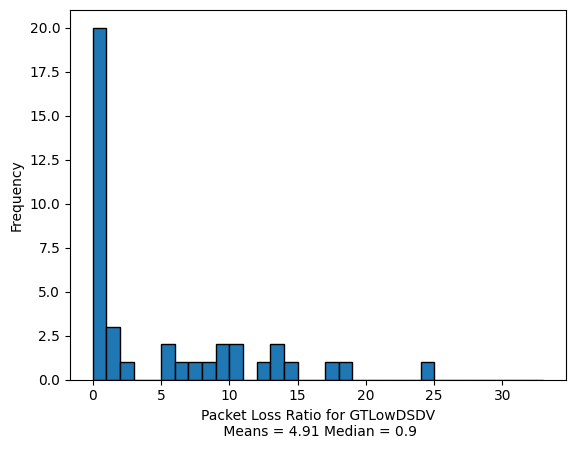

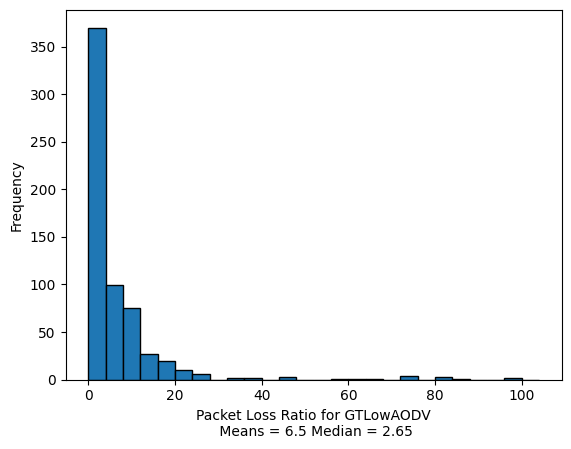

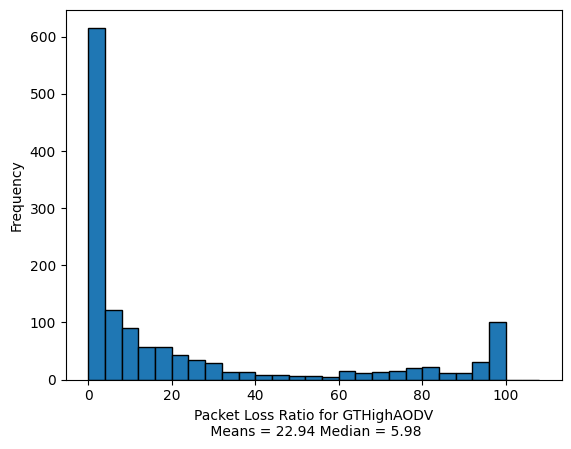

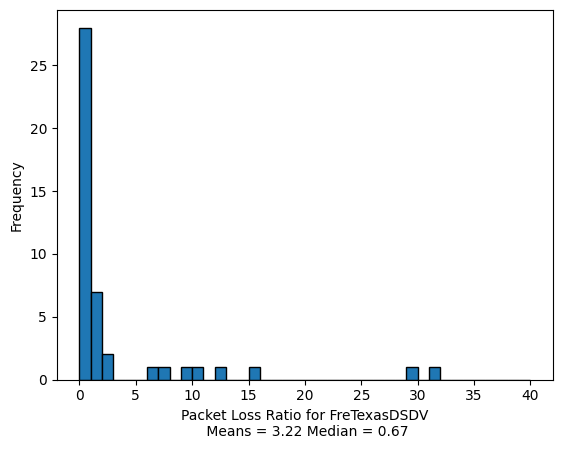

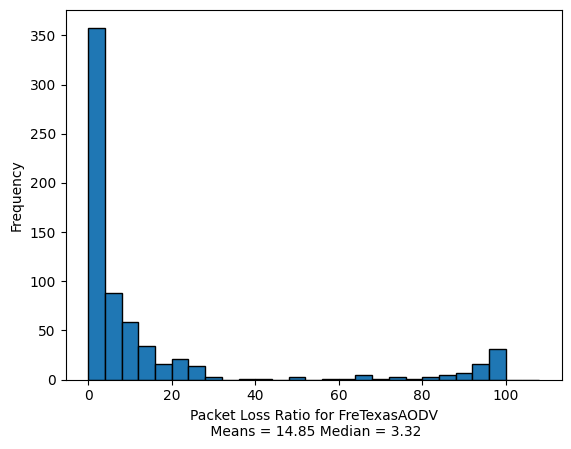

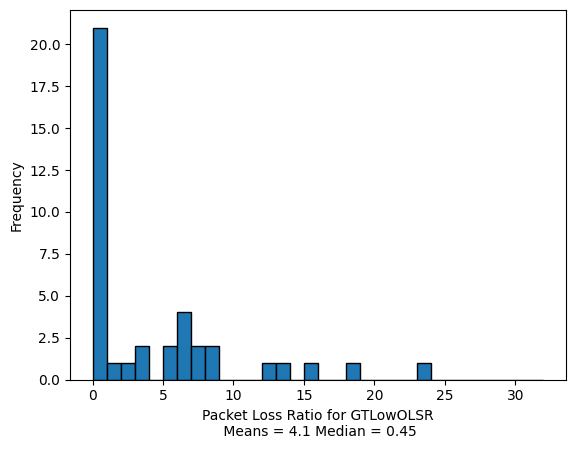

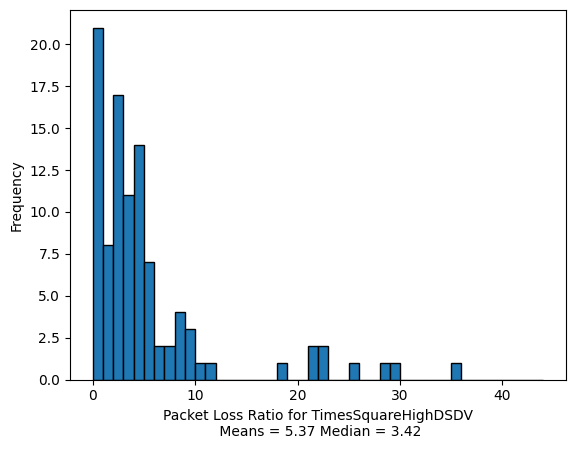

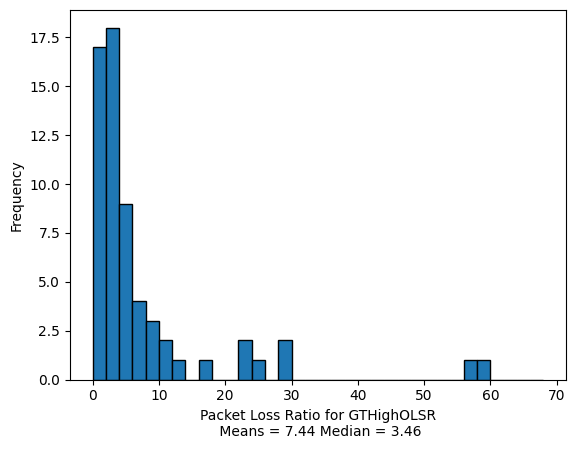

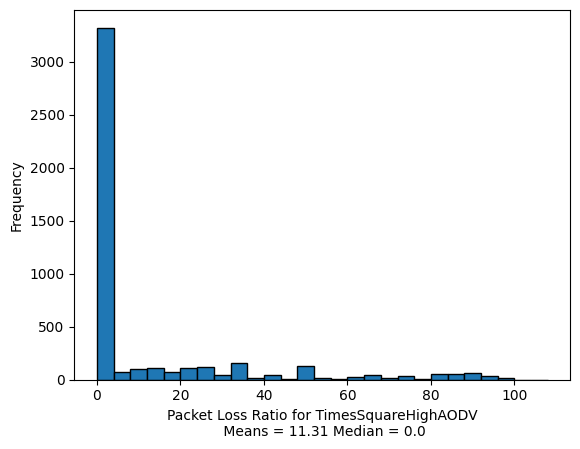

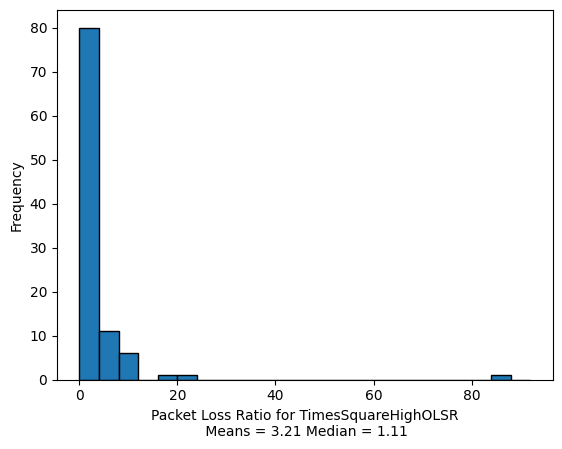

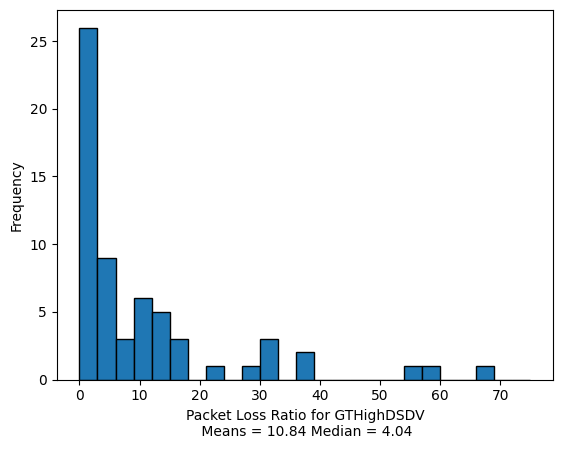

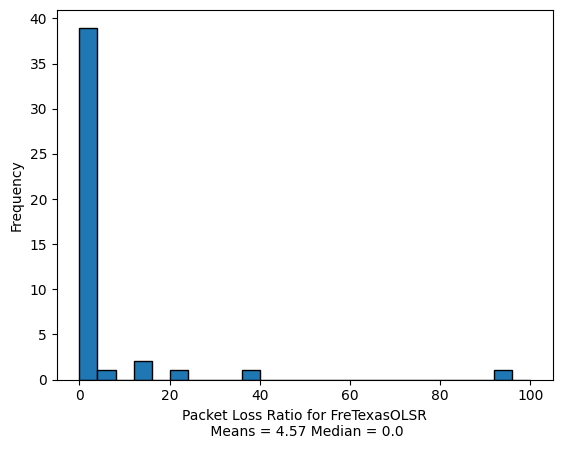

In [16]:
for path in file_ls:
    pl_ratio_ls = parse_pl_ratio(path)
    # print(delay_ls)
    bins_max = (max(pl_ratio_ls) // 100 + 1) * 100
    bins = range(0, int(max(pl_ratio_ls) + 10), int(max(pl_ratio_ls) // 20))
    plt.hist(pl_ratio_ls, bins=bins, edgecolor='black')
    name = path.split('/')[-1]
    plt.xlabel(f'Packet Loss Ratio for {name[8:-8]}\n Means = {round(means(pl_ratio_ls), 2)} Median = {round(median(pl_ratio_ls),2)}')
    plt.ylabel('Frequency')
    plt.show()

### Delay


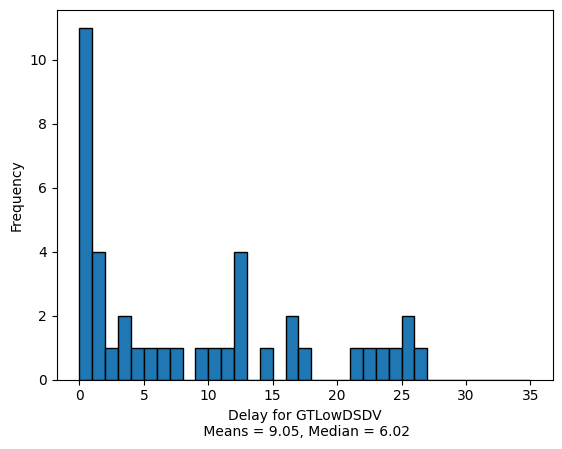

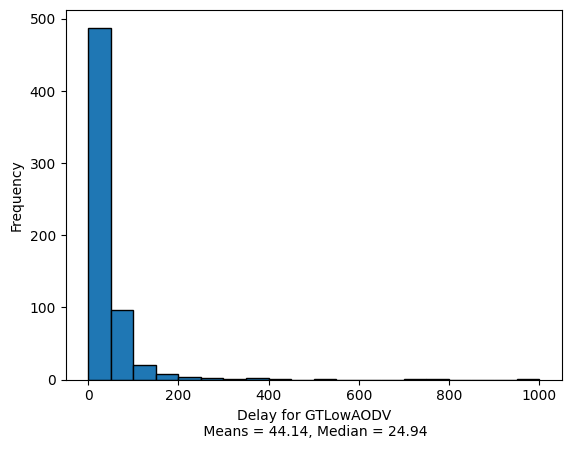

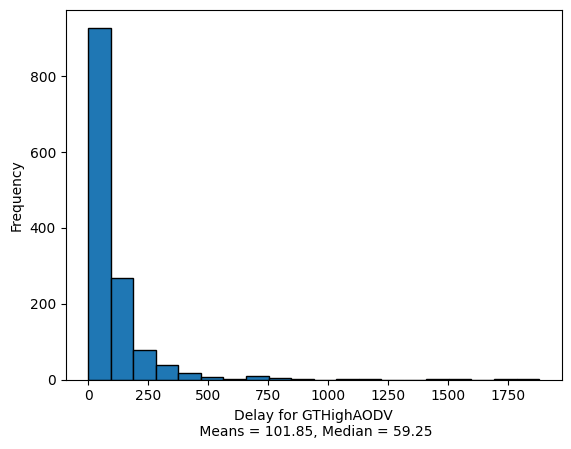

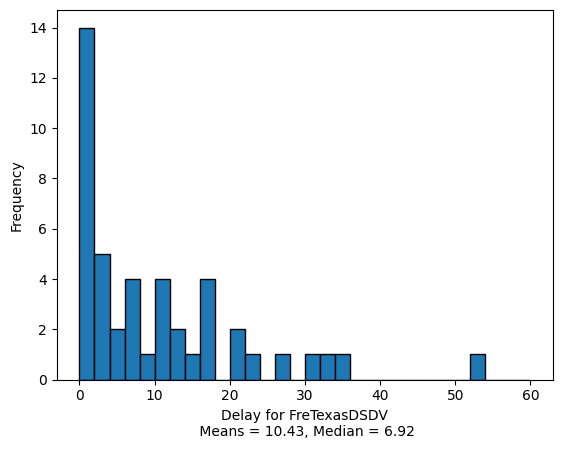

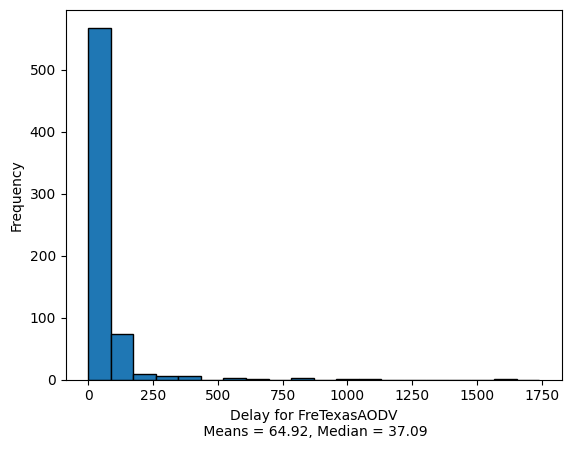

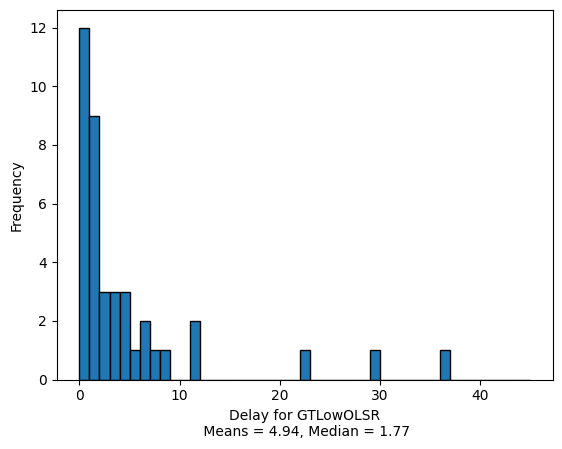

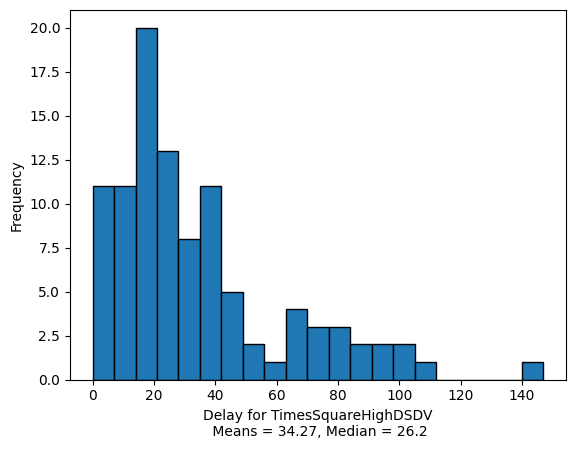

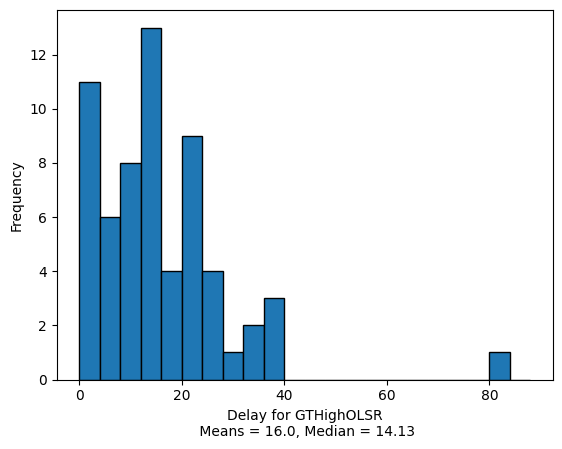

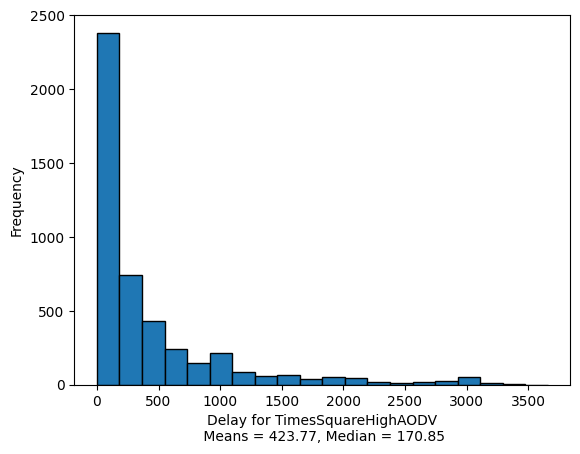

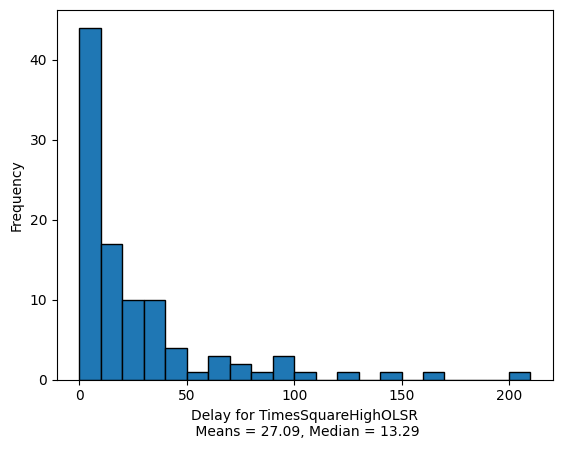

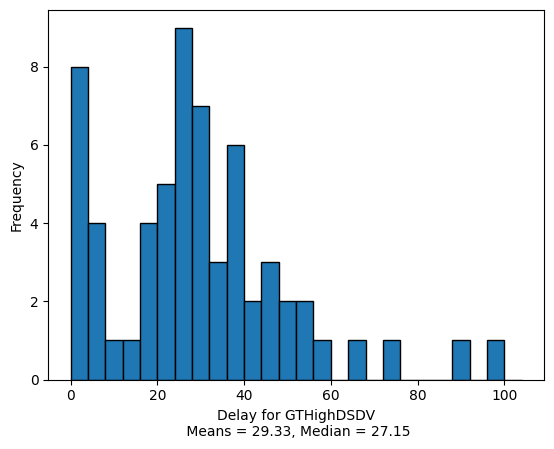

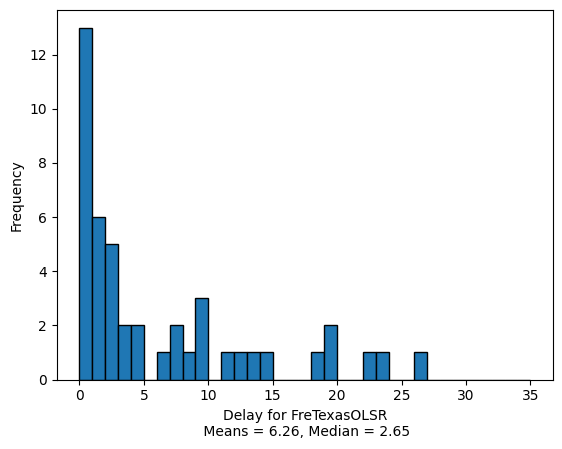

In [14]:
def parse_delay(path):
    output = !python3 flowmon-parse-results.py results/{path}
    delay_ls = []
    for line in output:
        if 'Mean Delay' in line:
            delay = line.split()[-2]
            if delay.startswith('D'):
                continue
            delay_ls.append(float(delay))
    return delay_ls

for path in file_ls:
    delay_ls = parse_delay(path)
    # print(delay_ls)
    bins_max = (max(delay_ls) // 100 + 1) * 100
    bins = range(0, int(max(delay_ls) + 10), int(max(delay_ls) // 20))
    plt.hist(delay_ls, bins=bins, edgecolor='black')
    name = path.split('/')[-1]
    plt.xlabel(f'Delay for {name[8:-8]}\n Means = {round(means(delay_ls),2)}, Median = {round(median(delay_ls),2)}')
    plt.ylabel('Frequency')
    plt.show()

### Number of Hops


In [6]:
def parse_num_hops(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    # print(len(lines))
    # return
    NumHops = []
    flowID = []
    for line in lines:
        if 'Ipv4FlowClassifier' in line:
            break
        if 'timesForwarded' in line:
            ls = line.split('"')

            flowID.append(int(ls[1]))
            NumHops.append(int(ls[-2]))
    return flowID, NumHops
        

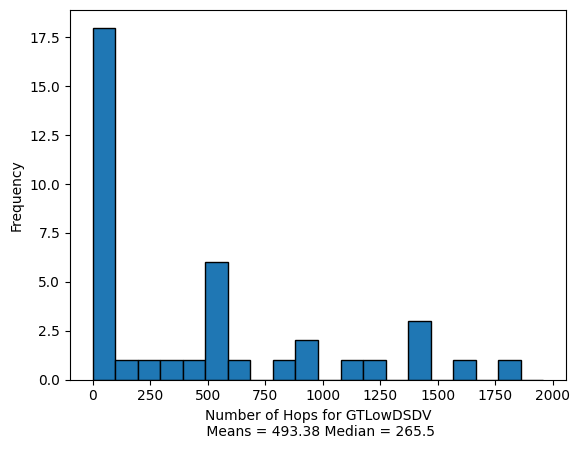

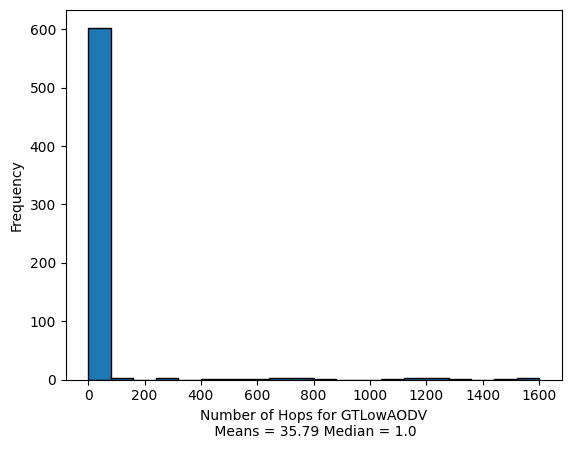

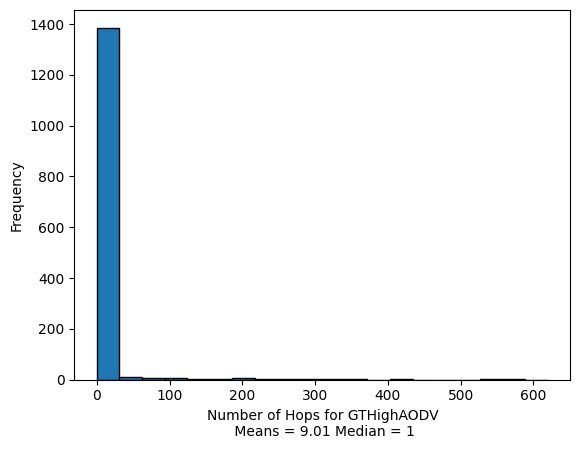

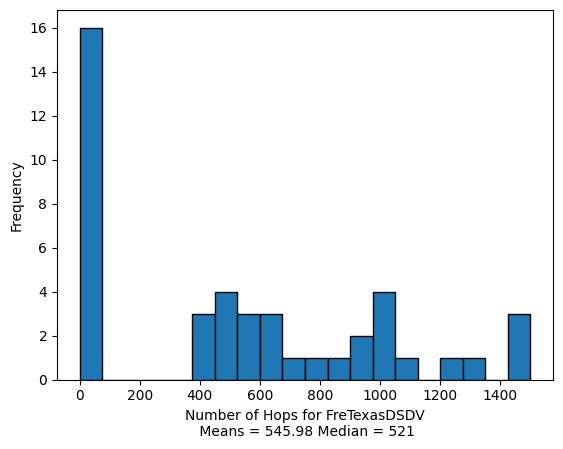

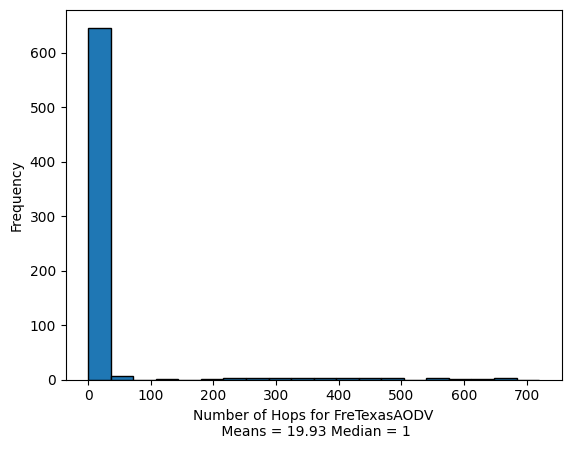

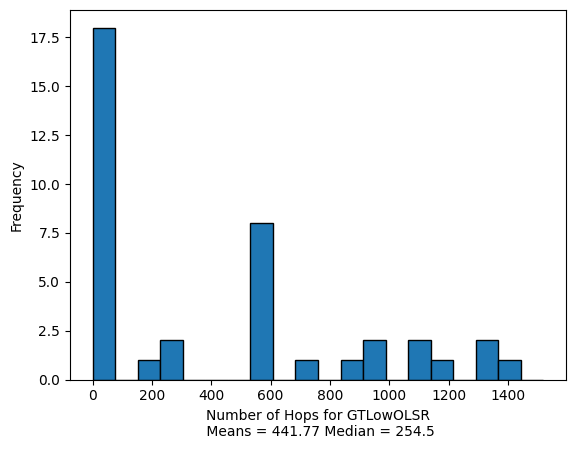

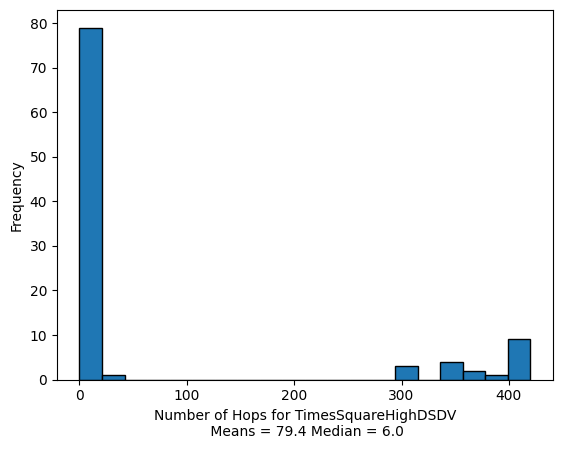

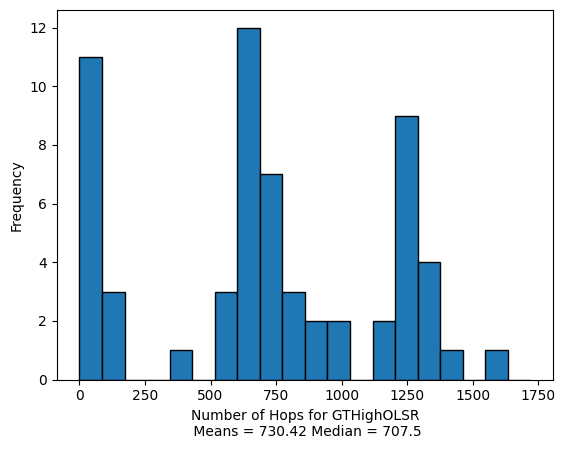

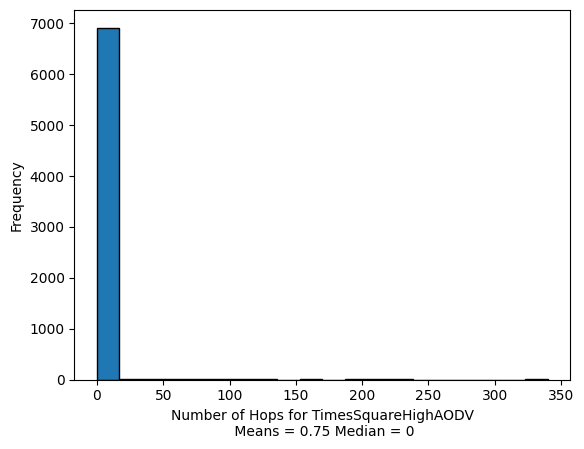

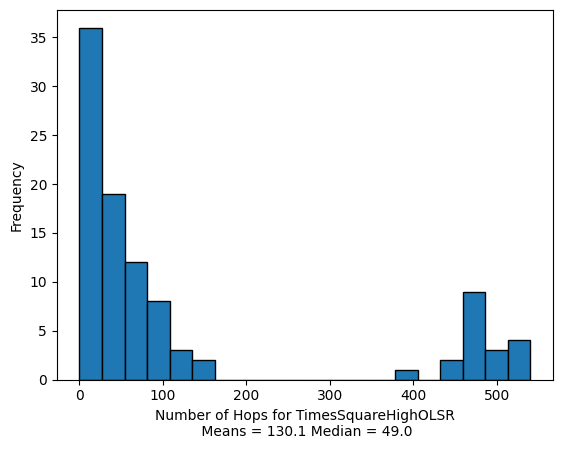

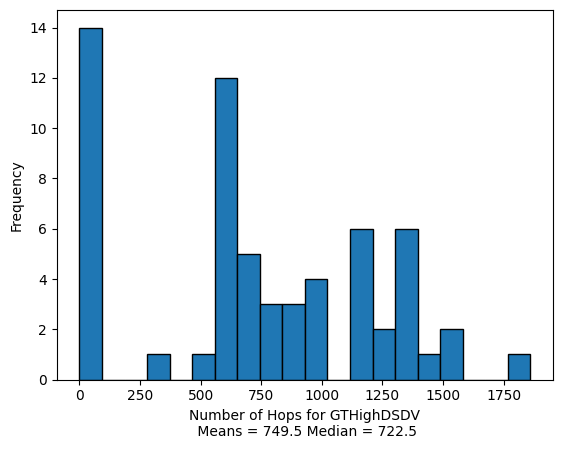

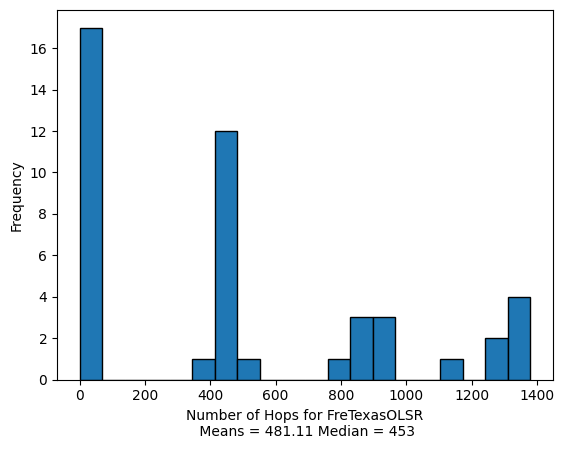

In [15]:
for path in file_ls:
    path = "results/" + path
    flowID, NumHops = parse_num_hops(path)
    bins_max = (max(NumHops) // 100 + 1) * 100
    bins = range(0, max(NumHops) + 10, max(NumHops) // 20)
    plt.hist(NumHops, bins=bins, edgecolor='black')
    name = path.split('/')[-1]
    plt.xlabel(f'Number of Hops for {name[8:-8]}\n Means = {round(means(NumHops),2)} Median = {round(median(NumHops),2)}')
    plt.ylabel('Frequency')
    plt.show()